In [ ]:
### THIS CELL SETS UP TOPIARY IN A GOOGLE COLAB ENVIRONMENT.
### IF RUNNING THIS NOTEBOOK LOCALLY, IT MAY BE SAFELY DELETED.

#@title Install software

#@markdown #### Installation requires two steps.

#@markdown 1. Install the software by pressing the _Play_ button on the left.
#@markdown Please be patient. This will take several minutes. <font color='teal'>
#@markdown After the  installation is complete, the kernel will reboot
#@markdown and Colab will complain that the session crashed. This is normal.</font>
#@markdown <br/><br/>

install_raxml = True    #@param {type:"boolean"}
install_generax = True  #@param {type:"boolean"}

#@markdown 2. After this cell runs, run the "Initialize environment" cell that follows.

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e:
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:

    import os
    os.chdir("/content/")

    import urllib.request
    urllib.request.urlretrieve("https://raw.githubusercontent.com/harmslab/topiary-examples/main/notebooks/colab_installer.py",
                              "colab_installer.py")

    import colab_installer
    colab_installer.install_topiary(install_raxml=install_raxml,
                                    install_generax=install_generax)

Setting up environment.


  0%|          | 0/6 [00:00<?, ?it/s]

miniconda already installed.
conda packages already installed.
pip packages already installed.
raxml-ng already installed.
generax already installed.
topiary already installed.


In [ ]:
### IF YOU ARE RUNNING LOCALLY, make sure you activated
### the topiary conda environment. (If you did not start this notebook
### within that environment, close the session, activate the topiary
### environment, and restart).

import topiary
import numpy as np
import pandas as pd
import glob
import os

### EVERYTHING AFTER THIS LINE IS IS USED TO SET UP TOPIARY IN A GOOGLE
### COLAB ENVIRONMENT. IF RUNNING THIS NOTEBOOK LOCALLY, THE LINES BELOW
### IN THIS CELL MAY BE SAFELY DELETED.

#@title Initialize environment

#@markdown  Run this cell to initialize the environment after installation.
#@markdown (This cell can also be run if the kernel dies during a calculation,
#@markdown allowing you to reload modules without having to
#@markdown reinstall).

#@markdown We recommend setting up a working directory on your google drive. This is a
#@markdown convenient way to pass files to topiary and will allow you to save
#@markdown your work. For example, if you type `topiary_work` into the form
#@markdown field below, topiary will save all of its calculations in the
#@markdown `topiary_work` directory in MyDrive (i.e. the top directory at
#@markdown https://drive.google.com). This script will create the directory if
#@markdown it does not already exist. If the directory already exists, any files
#@markdown that are already in that directory will be available to topiary. You could,
#@markdown for example, put a file called `seed.csv` in `topiary_work` and then
#@markdown access it as "seed.csv" in all cells below.
#@markdown <br/><br/>
#@markdown Note: Google may prompt you for permission to access the drive.
#@markdown To work in a temporary colab environment, leave this blank.

# Select a working directory on google drive
google_drive_directory = "" #@param {type:"string"}

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e:
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:

    import os
    os.chdir("/content/")

    topiary._in_notebook = "colab"
    import colab_installer
    colab_installer.initialize_environment()
    colab_installer.mount_google_drive(google_drive_directory)

Working directory: /content


In [ ]:
#name,sequence,alignment,uid,ott,keep,species
def read_fasta(filename):
    with open(filename, "r") as f:
        df = pd.DataFrame(columns=["name", "sequence","alignment","uid","ott","keep","species"])
        index = -1
        count = 0
        for l in f.readlines():
            if len(l) == 0:
                continue
            elif l.strip()[0] == ">":
                index += 1
                line = l.split('|')
                name = ((line[0])[1:]).strip()
                date = line[3].strip()
                df.loc[index] = [name + "_" + date, "", "", name + "_" + date, "", "TRUE", line[1]]
            else:
                if df.loc[df.index[index], 'sequence'] == "":
                    df.loc[df.index[index], 'sequence'] = l.strip()
                    df.loc[df.index[index], 'alignment'] = l.strip()
                else:
                    df.loc[df.index[index], 'sequence'] += l.strip()
                    df.loc[df.index[index], 'alignment'] += l.strip()
        return df
data = read_fasta('/content/congo_nucleoproteins_padded.fasta')
topiary.raxml.tree.generate_ml_tree(df=data,overwrite=True, model='FLU+G8+FO')



,name,sequence,alignment,uid,ott,keep,species
0,APT69541_1976,MDSRPQKIWMAPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,MDSRPQKIWMAPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,APT69541_1976,,TRUE,Homo sapiens
1,AKB09551_1995/04/01,MDSRPQKVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,MDSRPQKVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,AKB09551_1995/04/01,,TRUE,Homo sapiens
2,AGL73450_2012,MDPRPIRTWMMHNTSEVEADYHKILTAGLSVQQGIVRQRIIPVYQI...,MDPRPIRTWMMHNTSEVEADYHKILTAGLSVQQGIVRQRIIPVYQI...,AGL73450_2012,,TRUE,Homo sapiens
3,AKI84252_2014/08/16,MNSRPQKVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,MNSRPQKVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,AKI84252_2014/08/16,,TRUE,Homo sapiens
4,AXP07378_2018/05/10,MDSRPQKVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,MDSRPQKVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,AXP07378_2018/05/10,,TRUE,Homo sapiens
5,AYN74046_2018/07/27,MDSRPQKVWMTPNLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,MDSRPQKVWMTPNLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,AYN74046_2018/07/27,,TRUE,Homo sapiens
6,APT69582_1976,MDSRPQKIWMAPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,MDSRPQKIWMAPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,APT69582_1976,,TRUE,Homo sapiens
7,AYP10349_2014/08/22,MNSRPQKVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,MNSRPQKVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,AYP10349_2014/08/22,,TRUE,Homo sapiens
8,AYP10358_2014/08/26,MNSRPQRVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,MNSRPQRVWMTPSLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,AYP10358_2014/08/26,,TRUE,Homo sapiens
9,AYN74100_2018/08/13,MDSRPQKVWMTPNLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,MDSRPQKVWMTPNLTESDMDYHKILTAGLSVQQGIVRQRVIPVYQV...,AYN74100_2018/08/13,,TRUE,Homo sapiens




The 'keep' column must be boolean (True/False). pandas
did not recognize the column as boolean, so we're parsing it
manually by looking for 0/1, yes/no, true/false, etc.




'uid' column was invalid. topiary has fixed the problems noted below.
If you have already generated phylogenetic trees using a previous
version of this dataframe, **those trees are no longer compatible
with this dataframe**. To ensure compatibility, fix the problems
noted below and then re-read the dataframe into topiary. If you
have not already generated trees (or plan to generate new ones from
scratch) you may safely disregard this warning.

  + uid 'APT69541_1976' is invalid. Replacing with 'gWVOZDXpuz'
  + uid 'AKB09551_1995/04/01' is invalid. Replacing with 'uslJXzUCdo'
  + uid 'AGL73450_2012' is invalid. Replacing with 'vXNhcXbAMV'
  + uid 'AKI84252_2014/08/16' is invalid. Replacing with 'GoCsdkmoWo'
  + uid 'AXP07378_2018/05/10' is invalid. Replacing with 'kNKiFgBpjY'
  + uid 'AYN74046_2018/07/27' is inval

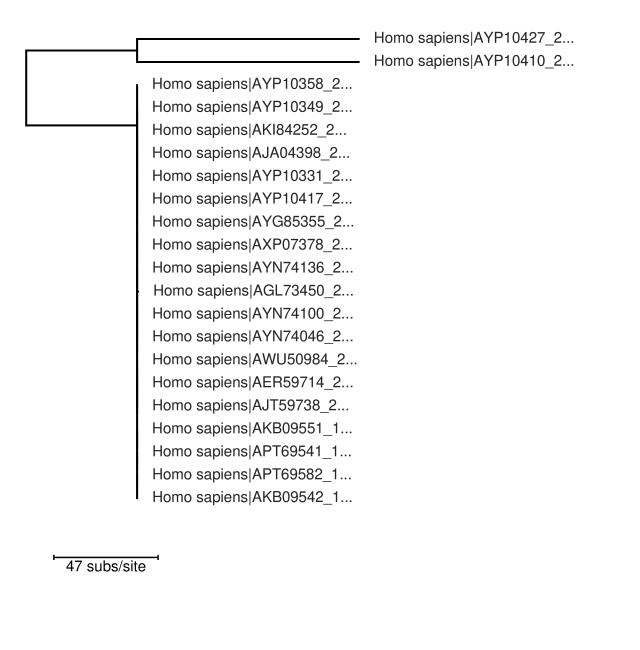

In [ ]:
# first find best model then generate the best model from this
topiary.raxml.model.find_best_model(data)
topiary.raxml.tree.generate_ml_tree(df=data,overwrite=True, model='FLU+G8+FO')